Naive Bayes classification accuracy 0.9491525423728814


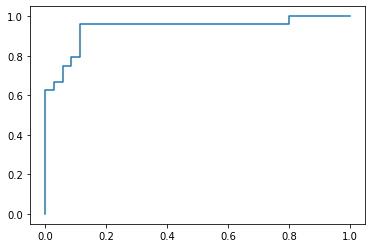

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = []
        self._var = []
        self._priors =  []

        for c in self._classes:
            X_c = X[y==c]
            self._mean.append(X_c.mean(axis=0))
            self._var.append(X_c.var(axis=0))
            self._priors.append(X_c.shape[0] / float(n_samples))
    def predict(self, X):
        y_probs=[self._probe(x) for x in X]
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred),np.array(y_probs)
    
    def _predict(self, x):
        posteriors = []
        probs=[]

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            probe=np.product(self._pdf(idx, x))*self._priors[idx]
            posteriors.append(posterior)
            probs.append(probe)
        
        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]
    
    def _probe(self, x):
        posteriors = []
        probs=[]

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            probe=np.product(self._pdf(idx, x))*self._priors[idx]
            posteriors.append(posterior)
            probs.append(probe)            

        return probs
    
        
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator




def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

w_data = pd.read_csv('wine.data',header=None)
w_data.columns = ['target', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

train_dataset, test_dataset, _, _ = train_test_split(w_data, w_data.target, test_size=0.33, random_state=0)
X_train = train_dataset.drop('target', axis=1).to_numpy()
y_train = train_dataset['target'].to_numpy()
X_test = test_dataset.drop('target', axis=1).to_numpy()
y_test = test_dataset['target'].to_numpy()


nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions,probs = nb.predict(X_test)

def confusion_df(grand_truth, predicts):
    df = pd.DataFrame({'predict': predicts, 'actual': grand_truth, 'cnt': 1})
    return pd.crosstab(df.actual, df.predict)

    
print("Naive Bayes classification accuracy", accuracy(y_test, predictions)) 

confusion_df(y_test,predictions)



pos_label=1
thresholds=np.flip(np.sort(probs[:,pos_label]))
thresholds=np.r_[thresholds[0]+1,thresholds]

tprs=[]
fprs=[]

for threshold in thresholds:
    fpr=y_test[(probs[:,pos_label]>=threshold)&((y_test-1)!=pos_label)].shape[0]/y_test[(y_test-1)!=pos_label].shape[0]
    tpr=y_test[(probs[:,pos_label]>=threshold)&((y_test-1)==pos_label)].shape[0]/y_test[(y_test-1)==pos_label].shape[0]
    tprs.append(tpr)
    fprs.append(fpr)

plt.plot(fprs,tprs)

In [82]:
probs[:,1]
probs


array([[6.95164292e-07, 9.69995314e-16, 1.64001391e-35],
       [6.51361405e-31, 7.79345246e-34, 3.10532512e-09],
       [7.19761249e-13, 3.05315805e-11, 2.43448832e-41],
       [3.47757801e-07, 4.38082337e-17, 5.44352325e-37],
       [1.43404146e-19, 2.08204323e-12, 1.83001928e-28],
       [2.29282309e-27, 8.63233782e-23, 1.18088056e-82],
       [9.47767960e-08, 1.28942272e-17, 6.99869355e-42],
       [8.38818770e-30, 1.74472873e-19, 1.53845232e-07],
       [9.12639537e-16, 1.65402871e-07, 2.80759121e-22],
       [5.41554231e-22, 2.88703436e-08, 7.77433461e-15],
       [1.80592837e-23, 3.85949160e-14, 1.60042641e-09],
       [3.39207540e-40, 1.42979098e-19, 3.36608504e-11],
       [2.36469602e-07, 3.13459588e-25, 4.18273419e-55],
       [9.61450799e-12, 2.39711798e-12, 1.42246156e-46],
       [7.57966799e-24, 1.04067361e-23, 2.58423762e-07],
       [5.06095432e-18, 9.01579888e-09, 5.55713161e-35],
       [5.75260231e-11, 1.20858517e-17, 7.91948995e-42],
       [1.23296438e-10, 3.75502

In [83]:
probs[:,1]


array([9.69995314e-16, 7.79345246e-34, 3.05315805e-11, 4.38082337e-17,
       2.08204323e-12, 8.63233782e-23, 1.28942272e-17, 1.74472873e-19,
       1.65402871e-07, 2.88703436e-08, 3.85949160e-14, 1.42979098e-19,
       3.13459588e-25, 2.39711798e-12, 1.04067361e-23, 9.01579888e-09,
       1.20858517e-17, 3.75502094e-37, 8.48709333e-13, 5.60392762e-18,
       4.73226770e-13, 2.30519372e-11, 1.52542776e-10, 7.77232469e-08,
       2.39665330e-11, 3.24448648e-08, 1.63674315e-09, 6.06431482e-08,
       6.05616053e-10, 2.42308646e-28, 1.04765209e-14, 2.20964625e-18,
       6.03251522e-09, 1.10334456e-16, 1.06080036e-17, 3.58938741e-12,
       2.64589598e-15, 2.93830966e-09, 5.04807903e-09, 2.09284600e-19,
       1.00928304e-10, 9.64688494e-19, 1.65945039e-08, 2.67635906e-08,
       2.36158926e-08, 6.66752264e-14, 3.62142105e-18, 1.34275885e-10,
       7.96500059e-22, 1.16988817e-20, 1.38811920e-13, 2.09115517e-15,
       1.53072428e-15, 1.43087578e-50, 2.49773776e-13, 6.19306826e-08,
      

In [84]:
y_test

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3, 2], dtype=int64)

In [88]:
thresholds=np.flip(np.sort(probs[:,pos_label]))
print(np.flip(np.sort(probs[:,pos_label])))

[1.65402871e-07 7.77232469e-08 6.19306826e-08 6.06431482e-08
 3.24448648e-08 2.88703436e-08 2.67635906e-08 2.36158926e-08
 1.65945039e-08 9.01579888e-09 6.03251522e-09 5.04807903e-09
 2.93830966e-09 1.63674315e-09 6.05616053e-10 1.52542776e-10
 1.34275885e-10 1.00928304e-10 3.05315805e-11 2.39665330e-11
 2.30519372e-11 6.12011978e-12 3.58938741e-12 2.39711798e-12
 2.08204323e-12 8.48709333e-13 4.73226770e-13 2.57455886e-13
 2.49773776e-13 1.38811920e-13 6.66752264e-14 3.85949160e-14
 1.04765209e-14 2.64589598e-15 2.09115517e-15 1.53072428e-15
 9.69995314e-16 1.10334456e-16 4.38082337e-17 1.28942272e-17
 1.20858517e-17 1.06080036e-17 5.60392762e-18 3.62142105e-18
 2.20964625e-18 9.64688494e-19 2.09284600e-19 1.74472873e-19
 1.42979098e-19 1.16988817e-20 7.96500059e-22 8.63233782e-23
 1.04067361e-23 3.13459588e-25 2.42308646e-28 8.77578739e-33
 7.79345246e-34 3.75502094e-37 1.43087578e-50]
